In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### EDA - Exploratory Data Analysis

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

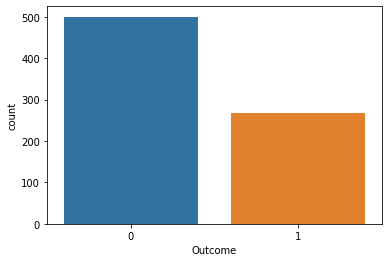

In [8]:
sns.countplot(x=df['Outcome'])
plt.show()

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

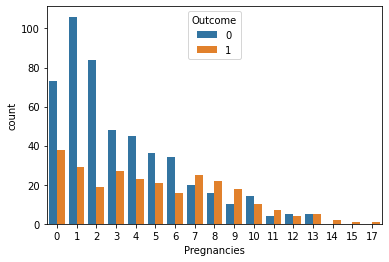

In [11]:
sns.countplot(x=df['Pregnancies'],hue=df['Outcome'])
plt.show()

In [12]:
df.groupby(['Pregnancies','Outcome'])['Outcome'].count()

Pregnancies  Outcome
0            0           73
             1           38
1            0          106
             1           29
2            0           84
             1           19
3            0           48
             1           27
4            0           45
             1           23
5            0           36
             1           21
6            0           34
             1           16
7            0           20
             1           25
8            0           16
             1           22
9            0           10
             1           18
10           0           14
             1           10
11           0            4
             1            7
12           0            5
             1            4
13           0            5
             1            5
14           1            2
15           1            1
17           1            1
Name: Outcome, dtype: int64

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

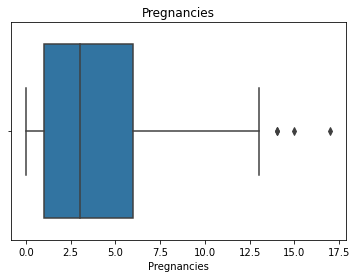

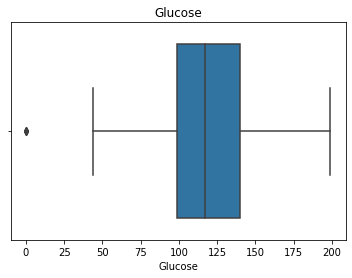

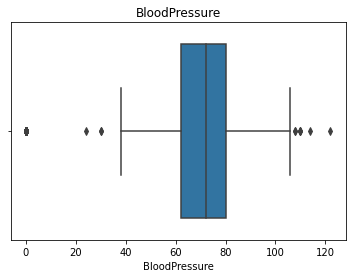

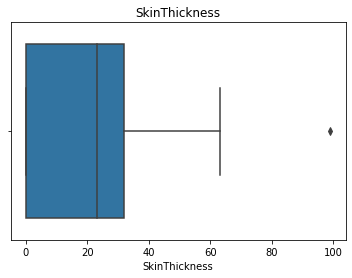

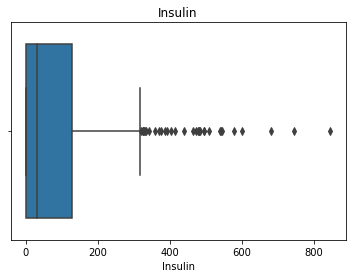

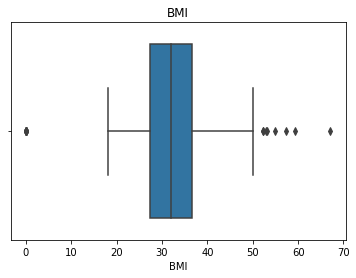

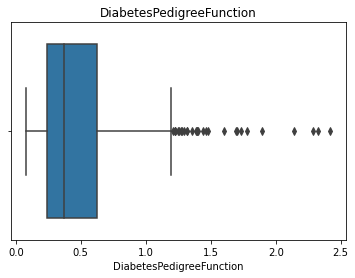

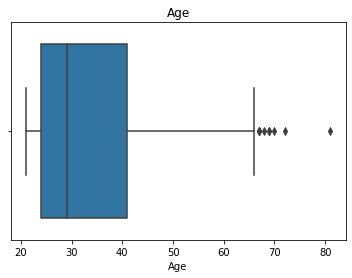

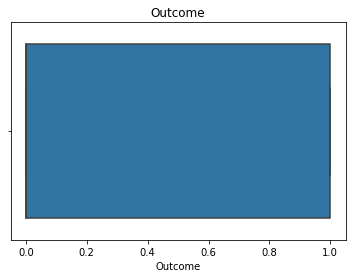

In [14]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
# DiabetesPedigreeFunction and Insulin

In [17]:
df[['DiabetesPedigreeFunction','Insulin']].describe(percentiles=[0.03,0.97])

,DiabetesPedigreeFunction,Insulin
count,768.000000,768.000000
mean,0.471876,79.799479
std,0.331329,115.244002
min,0.078000,0.000000
3%,0.127010,0.000000
50%,0.372500,30.500000
97%,1.257930,369.900000
max,2.420000,846.000000


In [18]:
print(len(df[df['DiabetesPedigreeFunction']>1.257930]))
print(len(df[df['Insulin']>369.9]))

24
24


In [19]:
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction']>1.257930,1.257930,df['DiabetesPedigreeFunction'])
df['Insulin'] = np.where(df['Insulin']>369.9,369.9,df['Insulin'])

In [20]:
print(len(df[df['DiabetesPedigreeFunction']>1.257930]))
print(len(df[df['Insulin']>369.9]))

0
0


In [21]:
df[['DiabetesPedigreeFunction','Insulin']].describe(percentiles=[0.03,0.97])

,DiabetesPedigreeFunction,Insulin
count,768.000000,768.000000
mean,0.460899,75.447396
std,0.290891,98.588953
min,0.078000,0.000000
3%,0.127010,0.000000
50%,0.372500,30.500000
97%,1.257861,369.801000
max,1.257930,369.900000


In [22]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [23]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('predicted Results\n',ypred)
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Classficaition Report\n',classification_report(y_test,ypred))

#### 1) Log_Reg

In [28]:
m1 = LogisticRegression(max_iter=1000)
gen_metrics(m1,x_train,x_test,y_train,y_test)

Training score 0.7795138888888888
Testing score 0.796875
predicted Results
 [0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0]
Confusion Matrix
 [[107  13]
 [ 26  46]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       120
           1       0.78      0.64      0.70        72

    accuracy                           0.80       192
   macro avg       0.79      0.77      0.77       192
weighted avg       0.80      0.80      0.79       192



#### 2) DT Classifier

In [29]:
m2 = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=14)
gen_metrics(m2,x_train,x_test,y_train,y_test)

Training score 0.8836805555555556
Testing score 0.765625
predicted Results
 [0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0]
Confusion Matrix
 [[100  20]
 [ 25  47]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       120
           1       0.70      0.65      0.68        72

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.75       192
weighted avg       0.76      0.77      0.76       192



#### 3) RF Classifier

In [35]:
m3 = RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth=9)
gen_metrics(m3,x_train,x_test,y_train,y_test)

Training score 0.9895833333333334
Testing score 0.8020833333333334
predicted Results
 [1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0
 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 0]
Confusion Matrix
 [[104  16]
 [ 22  50]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       120
           1       0.76      0.69      0.72        72

    accuracy                           0.80       192
   macro avg       0.79      0.78      0.79       192
weighted avg       0.80      0.80      0.80       192



#### 4) SVM

In [31]:
m4 = SVC(kernel='linear',C=1)
gen_metrics(m4,x_train,x_test,y_train,y_test)

Training score 0.78125
Testing score 0.7916666666666666
predicted Results
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0]
Confusion Matrix
 [[108  12]
 [ 28  44]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       120
           1       0.79      0.61      0.69        72

    accuracy                           0.79       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



#### 5) KNN Classifier

In [32]:
m5 = KNeighborsClassifier(n_neighbors=27)
gen_metrics(m5,x_train,x_test,y_train,y_test)

Training score 0.7621527777777778
Testing score 0.75
predicted Results
 [1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
Confusion Matrix
 [[106  14]
 [ 34  38]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       120
           1       0.73      0.53      0.61        72

    accuracy                           0.75       192
   macro avg       0.74      0.71      0.71       192
weighted avg       0.75      0.75      0.74       192



In [38]:
pickle.dump(m3,open('diabetic.pkl', 'wb'))